# Econ 441A Assignment 1
## Juntao Li
## Student ID: 906092273

In [10]:
import wooldridge as woo
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2/a)

In [3]:
bwght=woo.data('bwght')
len(bwght.index)

1388

In [4]:
sum(bwght.cigs!=0)

212

#### 1388 women are in the sample. 212 of them report smoking during pregnancy.

# 2/b)

In [6]:
bwght.describe()

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
count,1388.000000,1388.000000,1388.000000,1388.000000,1192.000000,1387.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,29.026657,19.552954,130.559006,118.699568,13.186242,12.935833,1.632565,0.520893,0.784582,2.087176,4.760031,7.418723,0.104359,3.071271
std,18.739285,7.795598,10.244485,20.353964,2.745985,2.376728,0.894027,0.499743,0.411260,5.972688,0.190662,1.272123,0.298634,0.918065
min,0.500000,2.000000,103.800003,23.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3.135494,1.437500,0.000000,-0.693147
25%,14.500000,15.000000,122.800003,107.000000,12.000000,12.000000,1.000000,0.000000,1.000000,0.000000,4.672829,6.687500,0.000000,2.674149
50%,27.500000,20.000000,130.800003,120.000000,12.000000,12.000000,1.000000,1.000000,1.000000,0.000000,4.787492,7.500000,0.000000,3.314186
75%,37.500000,26.000000,137.000000,132.000000,16.000000,14.000000,2.000000,1.000000,1.000000,0.000000,4.882802,8.250000,0.000000,3.624341
max,65.000000,38.000000,152.500000,271.000000,18.000000,18.000000,6.000000,1.000000,1.000000,50.000000,5.602119,16.937500,2.500000,4.174387


#### The average number of ciagrette smoked in a day is 2.087. The mean is not a good measure of the typical women’s smoking habits since it only represents the smoking habit of women during pregnancy.

# 2/c)

In [7]:
bwght.isnull().sum()

faminc        0
cigtax        0
cigprice      0
bwght         0
fatheduc    196
motheduc      1
parity        0
male          0
white         0
cigs          0
lbwght        0
bwghtlbs      0
packs         0
lfaminc       0
dtype: int64

#### The average fathedu is 13.186 years. And since there are 196 null values, only 1196 observations are used to compute this average.

# 3/a)

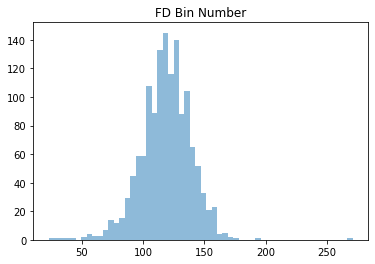

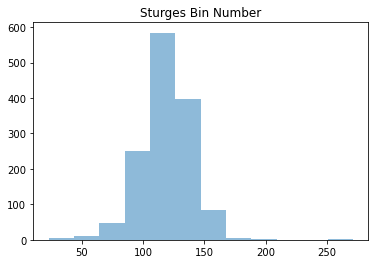

In [8]:
plt.hist(bwght.bwght,alpha=0.5,bins='fd')
plt.title('FD Bin Number')
plt.show()
plt.hist(bwght.bwght,alpha=0.5,bins='sturges')
plt.title('Sturges Bin Number')
plt.show()

#### FD method provides the histogram with more detailed edges but sometimes these edges may be useless and it will be harder for readers to understand the overall distribution. Sturges method, on the other side, provides histograms which can be read directly. However, it does not contain that much detailed edges as FD method does and the distribution may be too basic.

# 3/b)

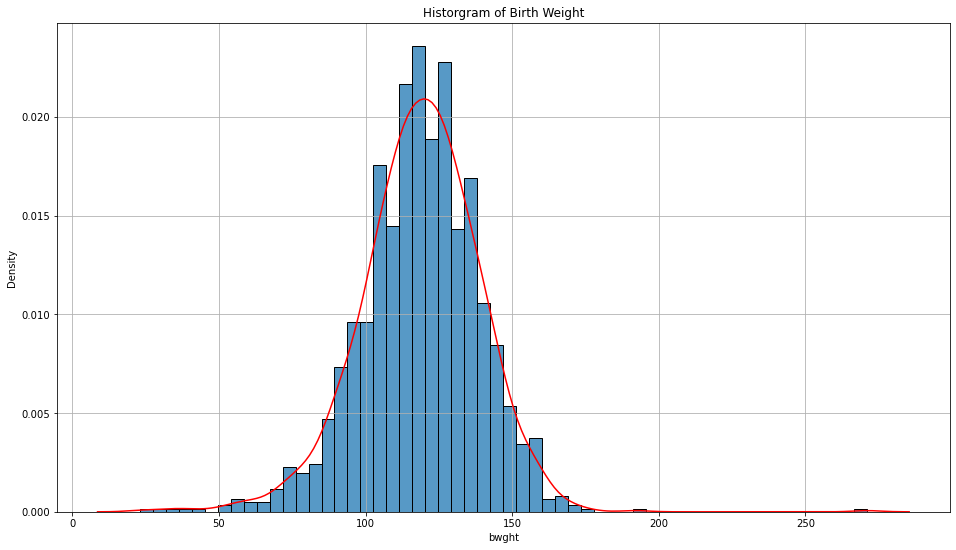

In [11]:
plt.figure(figsize=(16,9))
plt.title('Historgram of Birth Weight')
sns.histplot(bwght.bwght,stat='density')
sns.kdeplot(bwght.bwght,color='red')
plt.grid()

# 3/c)

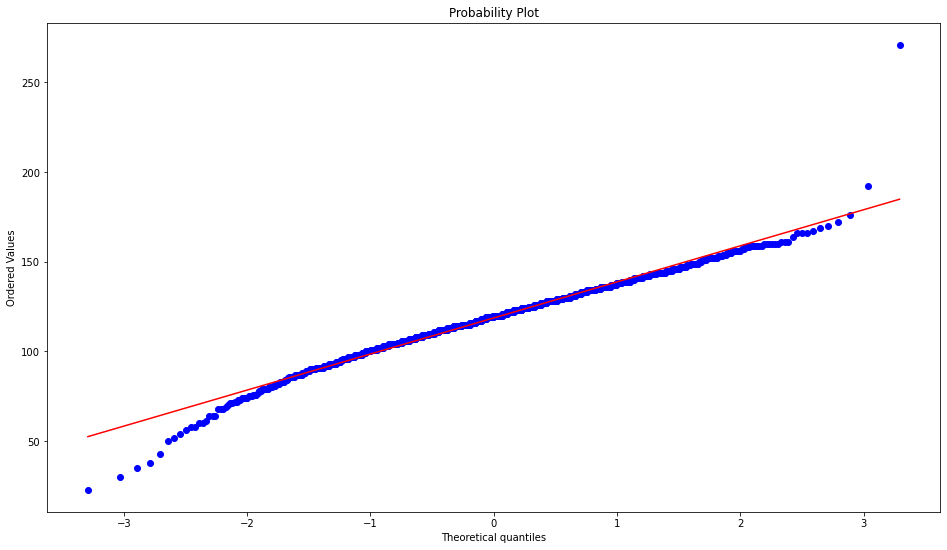

In [12]:
import scipy.stats as stats
plt.figure(figsize=(16,9))
stats.probplot(bwght.bwght, dist="norm", plot=plt)
plt.show()

#### I believe bwght is approximately normally distributed since almost all the dots are on the reference line.

# 3/d)

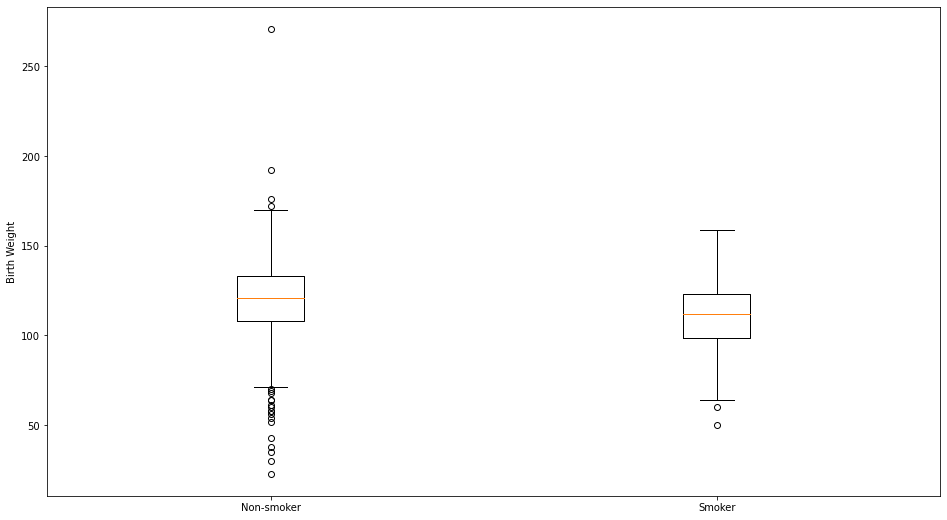

In [13]:
data=[bwght[bwght.cigs==0].bwght,bwght[bwght.cigs!=0].bwght]
plt.figure(figsize=(16,9))
plt.boxplot(data)
plt.ylabel("Birth Weight")
plt.xticks([1,2],["Non-smoker","Smoker"])
plt.show()

#### The boxplot of the non-smoker mothers has much more outliers than the boxplot of the smoker mothers. And the boxplot of the non-smoker mothers has babies with greater quartiles for their birth weights.

# 4/a)

In [15]:
import statsmodels.formula.api as smf
reg=smf.ols('bwght ~ cigs', data=bwght)
results=reg.fit()
results.params

Intercept    119.771900
cigs          -0.513772
dtype: float64

#### Since the coeffifient is -0.51, which is negative, then when cigarette use increases, the birth weight of new-born babies will decrease.

# 4/b)

#### When cigs=0, birth weight=119.7719-0.513772 * 0=119.7719 ounces. When cigs=3, birth weight=119.7719-0.513772 * 3=118.230584 ounces.

# 4/c)

In [29]:
reg=smf.ols('bwght~cigs',data=bwght)
results=reg.fit()
u_hat=results.resid
prop1=u_hat.sum()
print("The sum of our residual is: ",prop1)

The sum of our residual is:  5.1869619710487314e-11


# 4/d)

[]

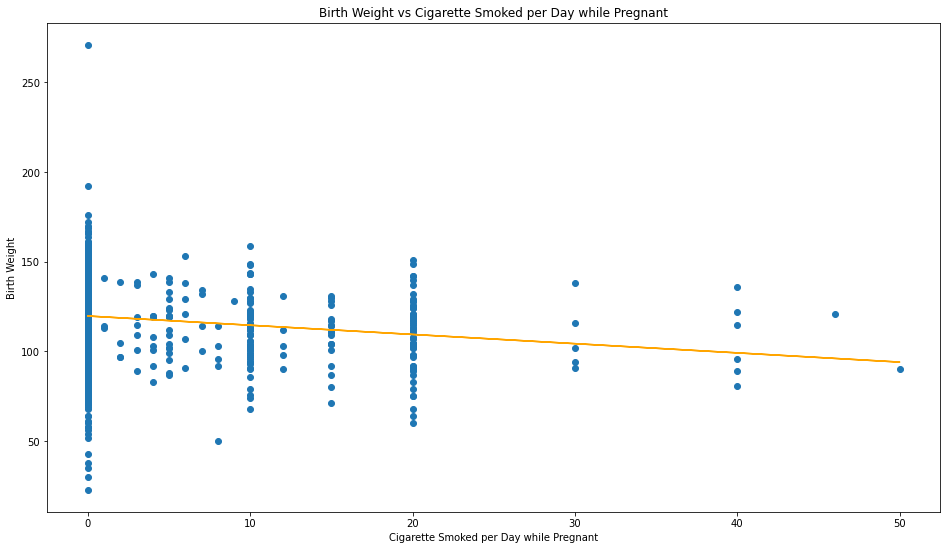

In [27]:
plt.figure(figsize=(16,9))
plt.scatter(bwght['cigs'],bwght['bwght'])
plt.plot(bwght['cigs'],results.fittedvalues,color='orange')
plt.title("Birth Weight vs Cigarette Smoked per Day while Pregnant")
plt.xlabel("Cigarette Smoked per Day while Pregnant")
plt.ylabel("Birth Weight")
plt.plot()